In [19]:
import numpy as np
from skimage.io import imread,imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from collections import Counter

In [20]:
def plot(image):
    plt.imshow(image, cmap = 'gray')
    plt.show()

In [21]:
image = rgb2gray(imread('main.jpg'))

posix = {
    "min_x": [],
    "max_x": [],
    "min_y": [],
    "max_y": []
}

#Colunas
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        if image[x][y] < 0.5:
            posix['min_x'].append(y)
            break

for x in range((image.shape[0] - 1), -1, -1):
    for y in range((image.shape[1] - 1), -1, -1):
         if image[x][y] < 0.5:
            posix['max_x'].append(y)
            break

#Linhas
for y in range(image.shape[1]):
    for x in range(image.shape[0]):   
        if image[x][y] < 0.5:
            posix['min_y'].append(x)
            break

for y in range((image.shape[1] - 1), -1, -1):
    for x in range((image.shape[0] - 1), -1, -1):
         if image[x][y] < 0.5:
            posix['max_y'].append(x)
            break


In [22]:
#Encontra coluna de pisxel mais repetida 

def positions(arr):
    
    final_posix = {
        "min_x": 0,
        "max_x": 0,
        "min_y": 0,
        "max_y": 0,
    }

    for x in arr:
        data = Counter(arr[x]).items()
        final_posix[x] = max(
            {
                v: k for k, v in dict(data).items()
            }.items()
        )[1]

    return final_posix
    

In [23]:
posix = positions(posix)
image = image[posix['min_y']: posix['max_y'], posix['min_x']: posix['max_x']]

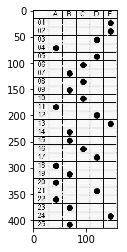

In [24]:
#Mostrando resultado final
plot(image)

In [25]:
print(image.max())
print(image.min())
print(image.mean())
print(image.std())

0.9921568627450981
0.0
0.8090505062780535
0.32039990881157865


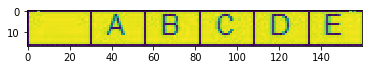

In [26]:
plt.imshow(image[:17,:])

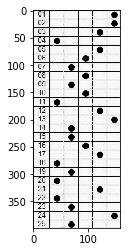

In [27]:
image = image[16:,:]
plot(image)
#Ignorando a linha das alternativas....

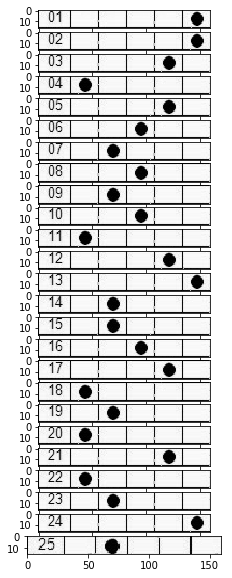

In [28]:
dims = image.shape
fig, ax = plt.subplots(25, 1, figsize = (30, 10), sharex = True)
count = 0;
for position in range(25):
    ax[position].imshow(image[count:count + 17, :], cmap = 'gray')
    count += 16 #Tamanho de cada linhas(retângulo)
    

In [38]:
dims = image.shape

def respostaMarcada(resp):
    
    alts = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
    }
    
    gabarito = {}
    
    for k, x in enumerate(resp):
        letra = x.index(min(x))
        gabarito[k + 1] =  alts[letra]
    return gabarito

def options():
    #fig, ax = plt.subplots(1, 5, figsize = (25, 10), sharex = True)
    count = 0;
    count2 = 30

    resp = []
    
    for __ in range(25):
        
        data = image[count: count + 17, :]
        opts = []
        
        for posix in range(5):
            #plt.imshow(data, cmap ='gray')
            opts.append(data[:, count2: count2 + 30].sum())
            #ax[posix].imshow(data, cmap = 'gray')
            count2 += 26
        resp.append(opts)
        count2 = 30
        count += 16
        
    return resp

resp = options()
respostaMarcada(resp)

{1: 'E',
 2: 'E',
 3: 'D',
 4: 'A',
 5: 'D',
 6: 'C',
 7: 'B',
 8: 'C',
 9: 'B',
 10: 'C',
 11: 'A',
 12: 'D',
 13: 'E',
 14: 'B',
 15: 'B',
 16: 'C',
 17: 'D',
 18: 'A',
 19: 'B',
 20: 'A',
 21: 'D',
 22: 'A',
 23: 'B',
 24: 'E',
 25: 'B'}